# Predicting Companies Bankruptcy

**The dataset is about bankruptcy prediction of Polish companies**

### Data Set Information:

**The dataset is about bankruptcy prediction of Polish companies**

The data was collected from Emerging Markets Information Service (EMIS, [Web Link]), which is a database containing information on emerging markets around the world. The bankrupt companies were analyzed in the period 2000-2012, while the still operating companies were evaluated from 2007 to 2013.

Basing on the collected data five classification cases were distinguished, that depends on the forecasting period:

- 1stYear: the data contains financial rates from 1st year of the forecasting period and corresponding class label that indicates bankruptcy status after 5 years. The data contains 7027 instances (financial statements), 271 represents bankrupted companies, 6756 firms that did not bankrupt in the forecasting period.

- 2ndYear: the data contains financial rates from 2nd year of the forecasting period and corresponding class label that indicates bankruptcy status after 4 years. The data contains 10173 instances (financial statements), 400 represents bankrupted companies, 9773 firms that did not bankrupt in the forecasting period.

- 3rdYear: the data contains financial rates from 3rd year of the forecasting period and corresponding class label that indicates bankruptcy status after 3 years. The data contains 10503 instances (financial statements), 495 represents bankrupted companies, 10008 firms that did not bankrupt in the forecasting period.

- 4thYear: the data contains financial rates from 4th year of the forecasting period and corresponding class label that indicates bankruptcy status after 2 years. The data contains 9792 instances (financial statements), 515 represents bankrupted companies, 9277 firms that did not bankrupt in the forecasting period.

- 5thYear: the data contains financial rates from 5th year of the forecasting period and corresponding class label that indicates bankruptcy status after 1 year. The data contains 5910 instances (financial statements), 410 represents bankrupted companies, 5500 firms that did not bankrupt in the forecasting period.

### Features description

- X1	net profit / total assets
- X2	total liabilities / total assets 
- X3	working capital / total assets 
- X4	current assets / short-term liabilities 
- X5	[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365 
- X6	retained earnings / total assets 
- X7	EBIT / total assets 
- X8	book value of equity / total liabilities 
- X9	sales / total assets 
- X10	equity / total assets 
- X11	(gross profit + extraordinary items + financial expenses) / total assets 
- X12	gross profit / short-term liabilities 
- X13	(gross profit + depreciation) / sales 
- X14	(gross profit + interest) / total assets 
- X15	(total liabilities * 365) / (gross profit + depreciation) 
- X16	(gross profit + depreciation) / total liabilities 
- X17	total assets / total liabilities 
- X18	gross profit / total assets 
- X19	gross profit / sales 
- X20	(inventory * 365) / sales 
- X21	sales (n) / sales (n-1) 
- X22	profit on operating activities / total assets 
- X23	net profit / sales 
- X24	gross profit (in 3 years) / total assets 
- X25	(equity - share capital) / total assets 
- X26	(net profit + depreciation) / total liabilities 
- X27	profit on operating activities / financial expenses 
- X28	working capital / fixed assets 
- X29	logarithm of total assets 
- X30	(total liabilities - cash) / sales 
- X31	(gross profit + interest) / sales 
- X32	(current liabilities * 365) / cost of products sold 
- X33	operating expenses / short-term liabilities 
- X34	operating expenses / total liabilities 
- X35	profit on sales / total assets 
- X36	total sales / total assets 
- X37	(current assets - inventories) / long-term liabilities 
- X38	constant capital / total assets 
- X39	profit on sales / sales 
- X40	(current assets - inventory - receivables) / short-term liabilities 
- X41	total liabilities / ((profit on operating activities + depreciation) * (12/365)) 
- X42	profit on operating activities / sales 
- X43	rotation receivables + inventory turnover in days 
- X44	(receivables * 365) / sales 
- X45	net profit / inventory 
- X46	(current assets - inventory) / short-term liabilities 
- X47	(inventory * 365) / cost of products sold 
- X48	EBITDA (profit on operating activities - depreciation) / total assets 
- X49	EBITDA (profit on operating activities - depreciation) / sales 
- X50	current assets / total liabilities 
- X51	short-term liabilities / total assets 
- X52	(short-term liabilities * 365) / cost of products sold) 
- X53	equity / fixed assets 
- X54	constant capital / fixed assets 
- X55	working capital 
- X56	(sales - cost of products sold) / sales 
- X57	(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation) 
- X58	total costs /total sales 
- X59	long-term liabilities / equity 
- X60	sales / inventory 
- X61	sales / receivables 
- X62	(short-term liabilities *365) / sales 
- X63	sales / short-term liabilities 
- X64	sales / fixed assets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io.arff import loadarff
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from collections import OrderedDict

## Data Preparation

### Loading Data

- Let's create a list called "data_objects". 
- The elements of this list are 5 data arrays each for 1 year

In [2]:
dataList = []
for i in range(1, 6):
    i = str(i)
    filename = i + "year.arff"
    dataList.append(loadarff(".\\data\\bankruptcy\\" + filename))

### Creating the data frames:

We need to transform the elemnts of the "data_objects" list from arrays to dataframes:

In [3]:
dfList = [pd.DataFrame.from_records(data = x[0]) for x in dataList]
dfList[0].head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,b'0'
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,b'0'
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,b'0'
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,b'0'
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,b'0'


In [4]:
companies = pd.concat(dfList, axis = 0)
companies.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,b'0'
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,b'0'
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,b'0'
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,b'0'
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,b'0'


### Rename the columns

In [5]:
oldColNam = companies.columns
newColNam = ["x"+ str(i) for i in range(1, 65)] + ["bankrupt"]
newColDic = {k:v for k,v in zip(oldColNam, newColNam)}
companies.rename(columns = newColDic, inplace = True)
companies["bankrupt"] = companies["bankrupt"].astype(int)
companies.shape

(43405, 65)

In [6]:
companies.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x56,x57,x58,x59,x60,x61,x62,x63,x64,bankrupt
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0


### Dealing with missing values


- This data set has a lot of missing value. We will address them as follow.
- This is only a quick way for demonstartion purpose. In reality we must be more carefule.

Let's count the number of null values in each row:

In [7]:
featuresNullCount = companies.isnull().sum()

delete features with more 2000 missing data:

In [8]:
featuresToDrop = featuresNullCount[featuresNullCount > 2000].index
featuresToDrop

Index(['x21', 'x27', 'x37', 'x45', 'x60'], dtype='object')

Drop the mentioned featured:

In [9]:
companies.drop(featuresToDrop, axis = 1, inplace = True)

For the rest of features, we will fill their missed data by the median:

In [10]:
companies.fillna(companies.median(), inplace = True)
companies.shape

(43405, 60)

So, we do not have missed data any more.

In [11]:
companies.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x55,x56,x57,x58,x59,x61,x62,x63,x64,bankrupt
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,348690.0,0.121960,0.39718,0.87804,0.001924,5.1372,82.658,4.4158,7.4277,0
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,2304.6,0.121300,0.42002,0.85300,0.000000,3.2732,107.350,3.4000,60.9870,0
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,6332.7,0.241140,0.81774,0.76599,0.694840,3.9510,134.270,2.7185,5.2078,0
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,20545.0,0.054015,0.14207,0.94598,0.000000,3.6147,86.435,4.2228,5.5497,0
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,3186.6,0.134850,0.48431,0.86515,0.124440,4.3158,127.210,2.8692,7.8980,0


### We have an unballanced classification problem:
- As can be seen below, the target data is either 0 or 1 and about 95% of them are 0. This means that the data is unbalanced.

In [12]:
100 * companies["bankrupt"].value_counts(normalize = True)

0    95.182583
1     4.817417
Name: bankrupt, dtype: float64

In [13]:
print('{}% of companies are still operating'.format(round(100 * companies['bankrupt']
                                                       .value_counts(normalize = True)[0], 2)))

print('{}% of companies are barnkrupted'.format(round(100 * companies['bankrupt']
                                                      .value_counts(normalize = True)[1], 2)))

95.18% of companies are still operating
4.82% of companies are barnkrupted


## Predicting Bankrutcy using the unballanced dataset:


#### Defining a function to create the confuxion matrix

In [14]:
def printMatrix(CM, lables = ["operating", "bankrupt"]):
    df = pd.DataFrame(data = CM, columns = lables, index = lables)
    df.index.name = "TRUE"
    df.columns.name = "PREDICTION"
    df.loc["Total"] = df.sum()
    df["Total"] = df.sum(axis = 1)
    return df

#### Preparing Matrix Data Frame

In [15]:
metrics = pd.DataFrame(index = ["Accuracy", "Precision", "Recall"], 
                       columns = ["Null", "LogisticReg", "ClassTree", "NaiveBayes"])
metrics

,Null,LogisticReg,ClassTree,NaiveBayes
Accuracy,NaN,NaN,NaN,NaN
Precision,NaN,NaN,NaN,NaN
Recall,NaN,NaN,NaN,NaN


- **Accuracy**: the proportion of the total number of predictions that are correct
- **Precision**: the proportion of positive predictions that are actually correct
- **Recall**: the proportion of positive observed values correctly predicted as such

**In this application:**
- **Accuracy**: Overall, how often the classifier is correct
- **Precision: Proportion of bankruptcy predictions that are actually correct**
- **Recall**: Proportion of bankrupted companies that the classifier actually identifies

#### Splitting and scalling

In [16]:
targetName = "bankrupt"
y = companies[targetName]
RS = RobustScaler()
X = companies.drop(targetName, axis = 1)
X = RS.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 123, stratify = y)

### A. Null Model
- Tip: it always predicts the most common category when we have categorical target
- We use the NULL model for the reference

In [17]:
mostComCateg = y_train.value_counts().idxmax()
mostComCateg

0

In [18]:
y_pred_test = [mostComCateg] * y_test.size

metrics.loc["Accuracy", "Null"] = accuracy_score(y_pred = y_pred_test, y_true = y_test)
metrics.loc["Precision", "Null"] = precision_score(y_pred = y_pred_test, y_true = y_test)
metrics.loc["Recall", "Null"] = recall_score(y_pred = y_pred_test, y_true = y_test)

CM = confusion_matrix(y_pred = y_pred_test, y_true = y_test)
printMatrix(CM)

C:\Users\tohid\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


PREDICTION,operating,bankrupt,Total
TRUE,,,
operating,8263,0,8263
bankrupt,418,0,418
Total,8681,0,8681


### B. Logistic Regression Model


- As we have a lot of features it is a good idea to have some  regularization, to prevent overfitting for this model.
- C = 10 is the regularization parameter used here

In [19]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C = 10, n_jobs = -1, random_state = 123)
LR.fit(X_train, y_train)
y_pred_test = LR.predict(X_test)

metrics.loc["Accuracy", "LogisticReg"] = accuracy_score(y_pred = y_pred_test, y_true = y_test)
metrics.loc["Precision", "LogisticReg"] = precision_score(y_pred = y_pred_test, y_true = y_test)
metrics.loc["Recall", "LogisticReg"] = recall_score(y_pred = y_pred_test, y_true = y_test)

CM = confusion_matrix(y_pred = y_pred_test, y_true = y_test)
printMatrix(CM)

PREDICTION,operating,bankrupt,Total
TRUE,,,
operating,8167,96,8263
bankrupt,402,16,418
Total,8569,112,8681


### C. Classification Tree Model

- Now we're using the max_depth parameter to control overfitting,
- so we make a classification tree that has 7 levels depth in maximum.

In [20]:
from sklearn.tree import DecisionTreeClassifier
CT = DecisionTreeClassifier(max_depth = 7, random_state = 123)
CT.fit(X_train, y_train)
y_pred_test = CT.predict(X_test)

metrics.loc["Accuracy", "ClassTree"] = accuracy_score(y_pred = y_pred_test, y_true = y_test)
metrics.loc["Precision", "ClassTree"] = precision_score(y_pred = y_pred_test, y_true = y_test)
metrics.loc["Recall", "ClassTree"] = recall_score(y_pred = y_pred_test, y_true = y_test)

CM = confusion_matrix(y_pred = y_pred_test, y_true = y_test)
printMatrix(CM)

PREDICTION,operating,bankrupt,Total
TRUE,,,
operating,8220,43,8263
bankrupt,343,75,418
Total,8563,118,8681


### D. Naive Bayes Classifier Model

Important tip: **In this example, we are using Gaussian Naive Bayes since most of the features are continuous features**

In [21]:
from sklearn.naive_bayes import GaussianNB
NBC = GaussianNB()
NBC.fit(X_train, y_train)
y_pred_test = NBC.predict(X_test)

metrics.loc["Accuracy", "NaiveBayes"] = accuracy_score(y_pred = y_pred_test, y_true = y_test)
metrics.loc["Precision", "NaiveBayes"] = precision_score(y_pred = y_pred_test, y_true = y_test)
metrics.loc["Recall", "NaiveBayes"] = recall_score(y_pred = y_pred_test, y_true = y_test)

CM = confusion_matrix(y_pred = y_pred_test, y_true = y_test)
printMatrix(CM)

PREDICTION,operating,bankrupt,Total
TRUE,,,
operating,136,8127,8263
bankrupt,16,402,418
Total,152,8529,8681


In [22]:
metrics = 100 * metrics
metrics

,Null,LogisticReg,ClassTree,NaiveBayes
Accuracy,95.184887,94.263334,95.553508,6.197443
Precision,0.0,14.285714,63.559322,4.713331
Recall,0.0,3.827751,17.942584,96.172249


### Plotting the models


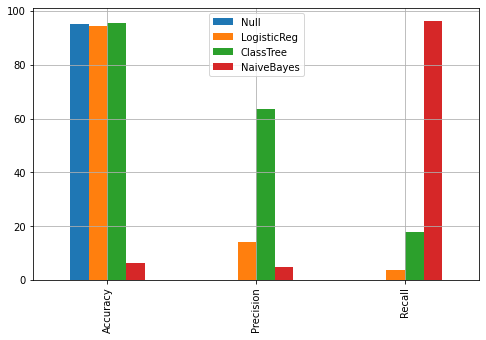

In [23]:
fig, ax = plt.subplots(figsize = (8, 5))
metrics.plot(kind = "bar", ax = ax)
ax.grid()

#### Insight:
In this example the Precision is the most importance factor, so the Class Tree is the best model.

## Improving the predictability


- We know that the classification trees work better if the classes don't show a lot of imbalance.
- There are a lot of methods to address this issue of imbalance, we are going to do a very simple one which is undersampling the majority class. 

#### Undersampling the majority class

In [24]:
companies["bankrupt"].value_counts()

0    41314
1     2091
Name: bankrupt, dtype: int64

- As can be seen, we have about 41k negative data and 2k positive data in the original dataset. It means this an **imbalanced dataset** which can cause to poor predictability of the models.
- So, we're going to build a new dataset which is relatively balanced and contains about 2k positive data and 4k negative data (extracted randomly from the majority class of 41k data).
- So we have a new dataset which about two thirds of the observations are in the negative class, and one third of the observations are in the positive class.
- The new dataset is still imbalanced, but the unbalance is not that dramatic compared to the original dataset.
- So let's build again all the models using the same hyperparameters to see if we get a better precision this time.

#### Preparing the new dataset

In [25]:
negCases = companies.loc[companies["bankrupt"] == 0].sample(n = 4000)
posCases = companies.loc[companies["bankrupt"] == 1]
companies = pd.concat([negCases, posCases])

In [26]:
companies["bankrupt"].value_counts()

0    4000
1    2091
Name: bankrupt, dtype: int64

#### Insight: 
So, the new dataset is much more balanced now.

#### Scalling and splitting

In [27]:
targetName = "bankrupt"
RS = RobustScaler()
X = companies.drop(targetName, axis = 1)
X = RS.fit_transform(X)
y = companies[targetName]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                    random_state = 123, stratify = y)

In [28]:
metricsNew = pd.DataFrame(index = ["Accuracy", "Precision", "Recall"], 
                       columns = ["NullN", "LogisticRegN", "ClassTreeN", "NaiveBayesN"])
metricsNew

,NullN,LogisticRegN,ClassTreeN,NaiveBayesN
Accuracy,NaN,NaN,NaN,NaN
Precision,NaN,NaN,NaN,NaN
Recall,NaN,NaN,NaN,NaN


### A. Null Model


In [29]:
y_pred_test = [mostComCateg] * y_test.size

metricsNew.loc["Accuracy", "NullN"] = accuracy_score(y_pred = y_pred_test, y_true = y_test)
metricsNew.loc["Precision", "NullN"] = precision_score(y_pred = y_pred_test, y_true = y_test)
metricsNew.loc["Recall", "NullN"] = recall_score(y_pred = y_pred_test, y_true = y_test)

CM = confusion_matrix(y_pred = y_pred_test, y_true = y_test)
printMatrix(CM)

C:\Users\tohid\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


PREDICTION,operating,bankrupt,Total
TRUE,,,
operating,801,0,801
bankrupt,418,0,418
Total,1219,0,1219


### B. Logistic Regression Model

In [30]:
LR1 = LogisticRegression(C = 10, n_jobs = -1, random_state = 123)
LR1.fit(X_train, y_train)
y_pred_test = LR1.predict(X_test)

metricsNew.loc["Accuracy", "LogisticRegN"] = accuracy_score(y_pred = y_pred_test, y_true = y_test)
metricsNew.loc["Precision", "LogisticRegN"] = precision_score(y_pred = y_pred_test, y_true = y_test)
metricsNew.loc["Recall", "LogisticRegN"] = recall_score(y_pred = y_pred_test, y_true = y_test)

CM = confusion_matrix(y_pred = y_pred_test, y_true = y_test)
printMatrix(CM)

PREDICTION,operating,bankrupt,Total
TRUE,,,
operating,595,206,801
bankrupt,181,237,418
Total,776,443,1219


### C. Classification Tree Model

In [31]:
CT1 = DecisionTreeClassifier(max_depth = 7, random_state = 123)
CT1.fit(X_train, y_train)
y_pred_test = CT1.predict(X_test)

metricsNew.loc["Accuracy", "ClassTreeN"] = accuracy_score(y_pred = y_pred_test, y_true = y_test)
metricsNew.loc["Precision", "ClassTreeN"] = precision_score(y_pred = y_pred_test, y_true = y_test)
metricsNew.loc["Recall", "ClassTreeN"] = recall_score(y_pred = y_pred_test, y_true = y_test)

CM = confusion_matrix(y_pred = y_pred_test, y_true = y_test)
printMatrix(CM)

PREDICTION,operating,bankrupt,Total
TRUE,,,
operating,680,121,801
bankrupt,159,259,418
Total,839,380,1219


### D. Naive Bayes Classifier Model

In [32]:
NBC1 = GaussianNB()
NBC1.fit(X_train, y_train)
y_pred_test = NBC1.predict(X_test)

metricsNew.loc["Accuracy", "NaiveBayesN"] = accuracy_score(y_pred = y_pred_test, y_true = y_test)
metricsNew.loc["Precision", "NaiveBayesN"] = precision_score(y_pred = y_pred_test, y_true = y_test)
metricsNew.loc["Recall", "NaiveBayesN"] = recall_score(y_pred = y_pred_test, y_true = y_test)

CM = confusion_matrix(y_pred = y_pred_test, y_true = y_test)
printMatrix(CM)

PREDICTION,operating,bankrupt,Total
TRUE,,,
operating,13,788,801
bankrupt,6,412,418
Total,19,1200,1219


In [33]:
metricsNew = 100 * metricsNew
metricsNew

,NullN,LogisticRegN,ClassTreeN,NaiveBayesN
Accuracy,65.709598,68.252666,77.030353,34.864643
Precision,0.0,53.498871,68.157895,34.333333
Recall,0.0,56.698565,61.961722,98.564593


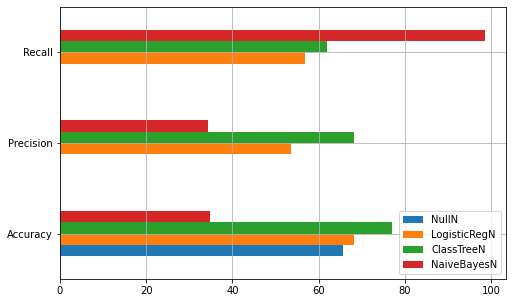

In [34]:
fig, ax = plt.subplots(figsize = (8, 5))
metricsNew.plot(kind = 'barh', ax = ax)
ax.grid()

#### Insight:
As can be seen the precision of all models is improved. Class Tree model is still the best model and not only did the precision increase by the new dataset, but also the recall has improved significantly.

#### Comparing Naive Bayes models

In [35]:
NBdf = pd.DataFrame(index = ["Accuracy", "Precision"], 
                       columns = ["LogisticReg", "LogisticReg_new", "", "", "ClassTree", "ClassTree_new", "", "", "NaiveBayes", "NaiveBayes_new"])

In [36]:
NBdf.loc["Accuracy", "LogisticReg"] = metrics.loc["Accuracy", "LogisticReg"]
NBdf.loc["Accuracy", "LogisticReg_new"] = metricsNew.loc["Accuracy", "LogisticRegN"]
NBdf.loc["Accuracy", "ClassTree"] = metrics.loc["Accuracy", "ClassTree"]
NBdf.loc["Accuracy", "ClassTree_new"] = metricsNew.loc["Accuracy", "ClassTreeN"]
NBdf.loc["Accuracy", "NaiveBayes"] = metrics.loc["Accuracy", "NaiveBayes"]
NBdf.loc["Accuracy", "NaiveBayes_new"] = metricsNew.loc["Accuracy", "NaiveBayesN"]
NBdf.loc["Accuracy", ""] = 0

NBdf.loc["Precision", "LogisticReg"] = metrics.loc["Precision", "LogisticReg"] 
NBdf.loc["Precision", "LogisticReg_new"] = metricsNew.loc["Precision", "LogisticRegN"]
NBdf.loc["Precision", "ClassTree"] = metrics.loc["Precision", "ClassTree"] 
NBdf.loc["Precision", "ClassTree_new"] = metricsNew.loc["Precision", "ClassTreeN"]
NBdf.loc["Precision", "NaiveBayes"] = metrics.loc["Precision", "NaiveBayes"] 
NBdf.loc["Precision", "NaiveBayes_new"] = metricsNew.loc["Precision", "NaiveBayesN"]
NBdf.loc["Precision", ""] = 0

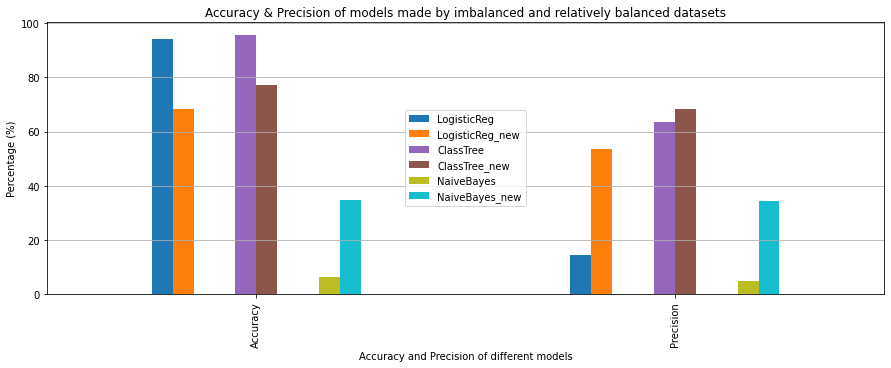

In [37]:
fig, ax = plt.subplots(figsize = (15, 5))
NBdf.plot(kind = 'bar', ax = ax)
ax.legend(loc = "center")
ax.set_title("Accuracy & Precision of models made by imbalanced and relatively balanced datasets")
ax.set_xlabel("Accuracy and Precision of different models")
ax.set_ylabel("Percentage (%)")
ax.grid(axis = "y")

#### Insight:
- By creating a more balanced dataset, the precision improves in all models. 
- Class Tree model has the highest precision and its accuracy is whithin a resonable range. 

### The top features

- We can use Classification Tree model to find the most important (the most influential features) for making the predictions.
- So so these are the most important features for the model:

In [38]:
featureNam = companies.drop("bankrupt", axis = 1).columns
featureImp = pd.Series(CT1.feature_importances_, index = featureNam)
featureImp.sort_values(ascending = False)[0:5]

x24    0.344305
x46    0.080570
x5     0.060869
x41    0.057200
x61    0.052498
dtype: float64

#### Insight:
The top three most important features for this model when deciding which company will be bankrupt and which company will be still operating, are:
- X24 gross profit (in 3 years) / total assets
- X46 (current assets - inventory) / short-term liabilities
- X5 [(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365

## Making predictions

In [39]:
from collections import OrderedDict

In [40]:
def individual_prediction(companyData, modelName):
    companyData = RS.transform(companyData.values.reshape(1, -1))
    prediction = modelName.predict(companyData)[0]
    proba = modelName.predict_proba(companyData)[0][0]
    if prediction == 0:
        return "Will be operating in the next 5 years with {:0.2f}% chance".format(100 * proba)
    else:
        return "Will be bankrupt in next 5 years (with {:0.2f}% chance)".format(100 * (1 - proba))

In [41]:
companyData = OrderedDict([
    ("x1", 0.3), ("x2",0.3), ("x3",0.3), ("x4",0.3), ("x5",0.3), 
    ("x6",0.3), ("x7",0.3), ("x8",0.3), ("x9",0.3), ("x10",0.3),
    ("x11",0.3), ("x12",0.3), ("x13",0.3), ("x14",0.3), ("x15",0.3),
    ("x16",0.3), ("x17",0.3), ("x18",0.3), ("x19",0.3), ("x20",0.3),
    ("x22",0.3), ("x23",0.3), ("x24",0.3), ("x25",0.3), ("x26",0.3),
    ("x28",0.3), ("x29",0.3), ("x30",0.3), ("x31",0.3), ("x32",0.3),
    ("x33",0.3), ("x34",0.3), ("x35",0.3), ("x36",0.3), ("x38",0.3),
    ("x39",0.3), ("x40",0.3), ("x41",0.3), ("x42",0.3), ("x43",0.3),
    ("x44",0.3), ("x46",0.3), ("x47",0.3), ("x48",0.3), ("x49",0.3),
    ("x50",0.3), ("x51",0.3), ("x52",0.3), ("x53",0.3), ("x54",0.3),
    ("x55",0.3), ("x56",0.3), ("x57",0.3), ("x58",0.3), ("x59",0.3),
    ("x61",3.3), ("x62",60.3), ("x63",6.3), ("x64",1.3)])

In [42]:
newCompanyData = pd.Series(companyData)

In [43]:
individual_prediction(newCompanyData, CT1)

'Will be bankrupt in next 5 years (with 100.00% chance)'

In [44]:
knownBankruptCompany = companies[companies['bankrupt'] == 1].iloc[3].drop('bankrupt')

In [45]:
individual_prediction(knownBankruptCompany, CT1)

'Will be bankrupt in next 5 years (with 100.00% chance)'

#### Insight:
- For the new company, the classification tree model predicts 100% chance of operating.
- For a definite bankrupting company the classification tree model predicts 100% chance of bankruptcy